In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bgt_reader import get_properties, WMTS_calculator, bgt_classifier
from helpers import wgs_to_rd
from matplotlib import cm


In [2]:
path = 'output/Wallengebied_small/treedict/marginal/2020/json_mar.city.json'
treedata = 'data/wallengebied_trees_small.csv'

In [3]:
with open(path) as jsonFile:
    jsonObject = json.load(jsonFile)
    jsonFile.close()
    
df = pd.read_csv(treedata)

In [4]:
roots = jsonObject['CityObjects']
vertices = jsonObject['vertices']
ids = roots.keys()
v = 15

print(vertices)

[[121748.76993093302, 486844.55315816135, 0.812], [121748.61756050322, 486845.27000467316, 0.812], [121748.18679544536, 486845.8629019108, 0.812], [121747.55211895134, 486846.2293325555, 0.812], [121746.82327235282, 486846.3059374198, 0.812], [121746.12627984805, 486846.0794708269, 0.812], [121745.58165777307, 486845.589090908, 0.812], [121745.2835762324, 486844.919588806, 0.812], [121745.2835762324, 486844.1867275167, 0.812], [121745.58165777307, 486843.5172254147, 0.812], [121746.12627984805, 486843.0268454958, 0.812], [121746.82327235282, 486842.8003789029, 0.812], [121747.55211895134, 486842.8769837672, 0.812], [121748.18679544536, 486843.2434144119, 0.812], [121748.61756050322, 486843.83631164953, 0.812], [121748.76993093302, 486844.55315816135, -0.3552417349815369], [121748.61756050322, 486845.27000467316, -0.3552417349815369], [121748.18679544536, 486845.8629019108, -0.3552417349815369], [121747.55211895134, 486846.2293325555, -0.3552417349815369], [121746.82327235282, 486846.30

In [5]:
display(df)

,Unnamed: 0,OBJECTNUMMER,Soortnaam_NL,Boomnummer,Soortnaam_WTS,Boomtype,Boomhoogte,Plantjaar,Eigenaar,Beheerder,Categorie,SOORT_KORT,SDVIEW,RADIUS,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,Unnamed: 17
0,13320,223321,Valse acacia,347179,Robinia pseudoacacia,Boom niet vrij uitgroeiend,15 tot 18 m.,1985,Gemeente Amsterdam,Stadsdeel Centrum,Robinia,Robinia,A,5,POINT(4.898957 52.368477),POINT(52.368477 4.898957),4.898957,52.368477,NaN
1,13321,223322,Valse acacia,347178,Robinia pseudoacacia,Boom niet vrij uitgroeiend,12 tot 15 m.,2000,Gemeente Amsterdam,Stadsdeel Centrum,Robinia,Robinia,A,4,POINT(4.899824 52.369259),POINT(52.369259 4.899824),4.899824,52.369259,NaN
2,13322,223323,Iep (cultuurvariëteit),347177,Ulmus `Dodoens`,Boom niet vrij uitgroeiend,6 tot 9 m.,2009,Gemeente Amsterdam,Stadsdeel Centrum,Ulmus,Ulmus,A,2,POINT(4.898309 52.369052),POINT(52.369052 4.898309),4.898309,52.369052,NaN
3,13323,223324,Iep (cultuurvariëteit),347176,Ulmus `Dodoens`,Boom niet vrij uitgroeiend,9 tot 12 m.,2007,Gemeente Amsterdam,Stadsdeel Centrum,Ulmus,Ulmus,A,3,POINT(4.897736 52.370201),POINT(52.370201 4.897736),4.897736,52.370201,NaN
4,13526,223527,Iep (cultuurvariëteit),347175,Ulmus `Dodoens`,Boom niet vrij uitgroeiend,9 tot 12 m.,2007,Gemeente Amsterdam,Stadsdeel Centrum,Ulmus,Ulmus,A,3,POINT(4.897389 52.369855),POINT(52.369855 4.897389),4.897389,52.369855,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,29884,239885,Himalayaberk (cultuurvariëteit),341746,Betula utilis jacquemontii,Boom niet vrij uitgroeiend,6 tot 9 m.,1996,Gemeente Amsterdam,Stadsdeel Centrum,Betula,Betula,A,2,POINT(4.898821 52.368698),POINT(52.368698 4.898821),4.898821,52.368698,NaN
154,29889,239890,Callery-peer (cultuurvariëteit),341741,Pyrus calleryana `Chanticleer`,Boom niet vrij uitgroeiend,12 tot 15 m.,1985,Gemeente Amsterdam,Stadsdeel Centrum,Overig,Pyrus,A,4,POINT(4.900108 52.369877),POINT(52.369877 4.900108),4.900108,52.369877,NaN
155,48802,258803,Onbekend,0,Onbekend,NaN,Onbekend,0,Gemeente Amsterdam,Stadsdeel Centrum,Onbekend,Onbekend,A,1,POINT(4.899962 52.370211),POINT(52.370211 4.899962),4.899962,52.370211,NaN
156,46057,186058,Onbekend,0,Onbekend,NaN,Onbekend,0,Gemeente Amsterdam,Stadsdeel Centrum,Onbekend,Onbekend,A,1,POINT(4.899844 52.369158),POINT(52.369158 4.899844),4.899844,52.369158,NaN


In [6]:
def check_bgt(points):
    functions = ['voetpad', 'fietspad', 'voetgangersgebied', 'parkeervlak', 'inrit', 'rijbaan lokale weg']
    types = ['waterloop', 'kademuur']
    count = 0
    
    # loop through points
    for p in points:
        
        # get point location
        x, y = p[0], p[1]

        # read out bgt
        col, row, i, j = WMTS_calculator(x, y)
        try:
            properties = get_properties(col, row, i, j)
        except:
            bgt = None
            
        # check function of bgt
        if 'functie' in properties:
            function = properties['functie']
            
            # check if function overlaps
            if function in functions:
                count += 1
                continue
        
        # building is also obstacle
        if 'bag_pnd' in properties:
            count += 1
            continue
        
        # check for waterloop or kademuur
        if 'type' in properties:
            type_bgt = properties['type']
            
            if type_bgt in types: 
                count += 1
                continue
        if 'plus_type' in properties:
            type_bgt = properties['plus_type']
            
            if type_bgt in types: 
                count += 1
                continue 
                
    return count



In [7]:
x_list = []
y_list = []
count_list = []
color_list = []
viridis = cm.get_cmap('viridis', v)

for n, i in enumerate(ids):
    lb = n*2*v
    ub = n*2*v+v
    points = vertices[lb:ub]
    tree_number = i[3:9]
    if tree_number == 'objNR_':
        continue
    
    # count intersections with bgt functions
    count = check_bgt(points)
    count_list.append(count/v)
    color = viridis(count/v)
    color_list.append(color)
    print(tree_number, count)

    # match tree with gemeente data to find location of center
    tree_index = df.index[df['Boomnummer'] == float(tree_number)][0]
    lng = df.at[tree_index, 'LNG']
    lat = df.at[tree_index, 'LAT']
    rd_x, rd_y = wgs_to_rd(lat, lng)
    x_list.append(rd_x)
    y_list.append(rd_y)


347179 15
347178 15
347177 9
347176 11
347175 11
347174 0
347173 1
347172 15
348537 10
346196 7
347348 7
347128 15
348272 0
348259 8
348258 15
348257 6
348022 15
348001 10
348000 15
347999 12
347991 11
347990 11
347484 0
348378 5
341026 8
340776 11
340775 14
340763 14
340762 15
340761 15
340760 15
340957 11
340738 10
340737 15
340736 14
340734 9
340731 13
340954 13
340950 8
340943 13
340941 9
340728 15
340727 13
340726 6
340725 11
340940 15
340938 11
340937 9
340936 12
340935 12
340934 12
340933 15
340932 14
340931 13
340930 13
340929 10
340928 11
340927 15
340712 14
340711 10
340710 10
340709 12
340708 13
340707 11
340706 11
340705 12
340704 14
340703 15
340702 10
340926 12
340925 15
340920 13
340917 15
340915 11
340913 11
340701 10
340700 9
340699 15
340697 13
340696 12
340695 14
340912 13
340911 14
340910 13
340909 15
340908 13
340907 14
340906 14
340905 12
340904 9
340903 15
339777 15
339776 15
339774 15
339772 15
339771 15
340894 15
340891 12
340889 13
340886 9
340885 11
340884 14

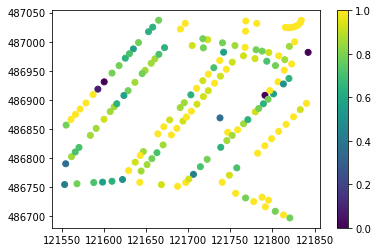

In [8]:
plt.scatter(x_list, y_list, c=color_list)
plt.colorbar()
plt.show()


In [9]:
sia_path =  r'C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\vallidatie\Meldingen\Meldingen_Centrum.xlsx'
sia_df = pd.read_excel(sia_path)
display(sia_df)


,SIA nr,Subrubriek,Melding,Datum,'(i)',Oplossing,Number of Records,Number of Records.1,LATITUDE,LONGITUDE,ADRES,POSTCODE
0,10955,"Onderhoud stoep, rijweg en parkeerplaats","Er liggen 2 stoeptegels los, opgedrukt door bo...",2018-08-26,(i),diverse plekken wortels verwijderd 2m2 tegels ...,1,1,52.367403,4.912298,Henri Polaklaan 31A,1018CR
1,12894,"Onderhoud stoep, rijweg en parkeerplaats","De stoeptegels, klinkers, komen omhoog door de...",2018-08-29,(i),bestrating is hersteld,1,1,52.373634,4.880967,Rozengracht 50A,1016ND
2,24946,"Onderhoud stoep, rijweg en parkeerplaats",De wortels van de bomen drukken de stenen van ...,2018-09-16,(i),melding is gisteren aan de aannemer gegeven,1,1,52.369963,4.912564,Laagte Kadijk 7,1018BA
3,27350,"Onderhoud stoep, rijweg en parkeerplaats",De stoep is in dit gedeelte op verschillende p...,2018-09-19,(i),De bestrating is hersteld,1,1,52.359439,4.896823,Weteringschans 261A,1017XJ
4,27388,"Onderhoud stoep, rijweg en parkeerplaats",Ter hoogte van nr 23 komen de stoeptegels op v...,2018-09-19,(i),De bestrating is hersteld,1,1,52.383229,4.888363,Tussen de Bogen 23,1013JB
...,...,...,...,...,...,...,...,...,...,...,...,...
153,1152247,"Onderhoud stoep, rijweg en parkeerplaats",WA : _x000D_\n_x000D_\nDe boomwortels drukken ...,2021-12-07,(i),Wat vervelend te horen dat u bijna bent gevall...,1,1,52.376173,4.879778,Egelantiersstraat 222A,1015PT
154,1162203,"Onderhoud stoep, rijweg en parkeerplaats",steen mist uit de bestrating. Stenen worden do...,2021-12-15,(i),U hebt ons verzocht om onderhoud te doen aan d...,1,1,52.378276,4.892958,Singel 38A,1015AB
155,1239795,"Onderhoud stoep, rijweg en parkeerplaats",straatstenen / kleine klinkers die hinderlijk ...,2022-03-01,(i),Wij hebben het onderhoud aan de straat uitgevo...,1,1,52.371317,4.907264,Nieuwe Uilenburgerstraat 1A,1011LM
156,1251371,"Onderhoud stoep, rijweg en parkeerplaats",In oktober 21 is er sprake van overstroming ge...,2022-03-11,(i),Melding intern doorgestuurd naar meldkamer Wat...,1,1,52.370426,4.929695,Czaar Peterstraat 109,1018PE


(486700.0, 487050.0)

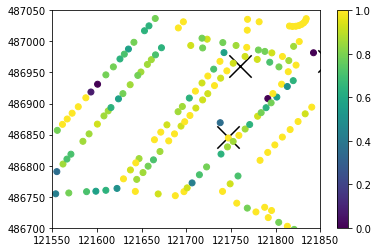

In [10]:
sia_x = []
sia_y = []
for index, row in sia_df.iterrows():
    lat = row['LATITUDE']
    lng = row['LONGITUDE']
    rd_x, rd_y = wgs_to_rd(lat, lng)
    sia_x.append(rd_x)
    sia_y.append(rd_y)
plt.scatter(sia_x, sia_y, c='Black', marker='x', s=500) 
plt.scatter(x_list, y_list, c=color_list)
plt.colorbar()
plt.xlim(121550, 121850)
plt.ylim(486700, 487050)

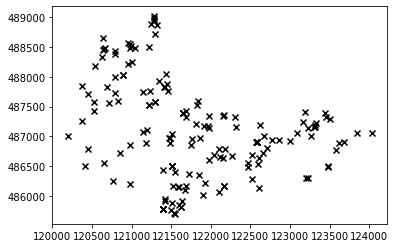

In [11]:

plt.scatter(sia_x, sia_y, c='Black', marker='x') 


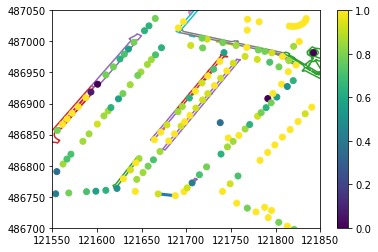

In [16]:
import shapefile as shp  
import matplotlib.pyplot as plt

sf = shp.Reader(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\vallidatie\Verhardingen\Planning2021_v2_boomwortelopdruk.dbf")

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x, y, zorder=-1)
plt.xlim(121550, 121850)
plt.ylim(486700, 487050)
plt.scatter(x_list, y_list, c=color_list, zorder=1)
plt.colorbar()
plt.show()

